In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix
from sc_sharp import scSHARP
import utilities

In [3]:
grid_results = pd.read_csv("grid_search_sim_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
130,0.848397,0.888439,0.0,0.001162,0.006702,0.0,2_15.txt,0.0,35,2,2,15
91,0.848297,0.887861,0.0,0.003176,0.018320,0.0,2_40.txt,0.0,20,2,2,40
4,0.848196,0.887283,0.0,0.002018,0.011641,0.0,2_25.txt,0.0,35,2,2,25
127,0.848096,0.886705,0.0,0.002995,0.017277,0.0,2_15.txt,0.0,20,2,2,15
7,0.848096,0.886705,0.0,0.001842,0.010624,0.0,2_25.txt,0.0,50,2,2,25
10,0.847796,0.884971,0.0,0.002029,0.011704,0.0,2_25.txt,0.0,65,2,2,25
1,0.846994,0.880347,0.0,0.004065,0.023448,0.0,2_25.txt,0.0,20,2,2,25
97,0.846693,0.878613,0.0,0.001703,0.009825,0.0,2_40.txt,0.0,50,2,2,40
163,0.846493,0.877457,0.0,0.003974,0.022928,0.0,3_25.txt,0.0,20,2,3,25


<AxesSubplot:xlabel='Batch', ylabel='Val Accuracy'>

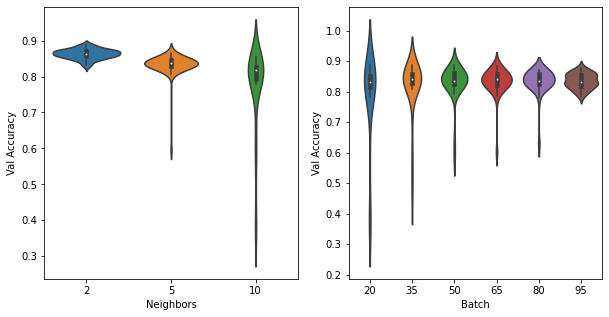

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])

<AxesSubplot:xlabel='Final Embedding', ylabel='Val Accuracy'>

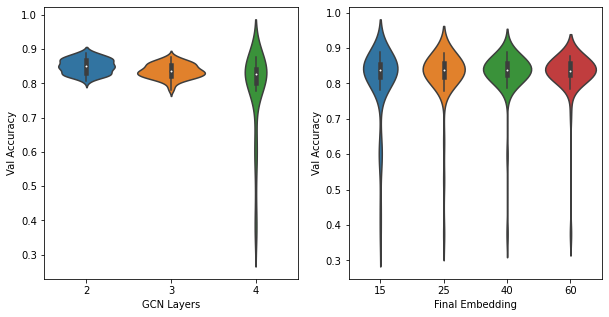

In [5]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])

In [14]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/"]
tools = ["sctype","scsorter","scina", "singler", "scpred"]
votes_necessary = .51
model_file = "configs/2_15.txt"
neighbors = 2
batch_size=35
training_epochs=150
random_inits = 5
counts="query_counts.csv"
meta="query_meta.csv"
meta_col = "Group"

In [15]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 37.242867
Loss in epoch 10 = 0.159520
Loss in epoch 20 = 0.033383
Loss in epoch 30 = 0.016296
Loss in epoch 40 = 0.007386
Loss in epoch 50 = 0.005174
Loss in epoch 60 = 0.003497
Loss in epoch 70 = 0.002584
Loss in epoch 80 = 0.001801
Loss in epoch 90 = 0.001362
Loss in epoch 100 = 0.002051
Loss in epoch 110 = 0.000734
Loss in epoch 120 = 0.000814
Loss in epoch 130 = 0.000582
Loss in epoch 140 = 0.000366
Loss in epoch 0 = 36.296116
Loss in epoch 10 = 0.170875
Loss in epoch 20 = 0.037857
Loss in epoch 30 = 0.019146
Loss in epoch 40 = 0.007930
Loss in epoch 50 = 0.005884
Loss in epoch 60 = 0.003300
Loss in epoch 70 = 0.002793
Loss in epoch 80 = 0.001852
Loss in epoch 90 = 0.001394
Loss in epoch 100 = 0.000948
Loss in epoch 110 = 0.000882
Loss in epoch 120 = 0.000806
Loss in epoch 130 = 0.000457
Loss in epoch 140 = 0.000419
Loss in epoch 0 = 37.271366
Loss in epoch 10 = 0.106774
Loss in epoch 20 = 0.030146
Loss in epoch 30 = 0.014022
Loss in epoch 40 = 0.008396
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,splat_0.7_de_rq,GCN,0.907415,0.943418,0.671212,0.005090,0.000000,0.038480
1,splat_0.7_de_rq,Max Col.,0.884770,0.943418,0.500000,0.000000,0.000000,0.000000
2,splat_0.7_de_rq,Confident Labels,NaN,0.943418,NaN,0.000000,0.000000,0.000000
3,splat_0.7_de_rq,sctype,0.676353,0.747113,0.212121,0.000000,0.000000,0.000000
4,splat_0.7_de_rq,scsorter,0.857715,0.906466,0.537879,0.000000,0.000000,0.000000
5,splat_0.7_de_rq,scina,0.534068,0.599307,0.106061,0.000000,0.000000,0.000000
6,splat_0.7_de_rq,singler,0.837675,0.848730,0.765152,0.000000,0.000000,0.000000
7,splat_0.7_de_rq,scpred,0.566132,0.633949,0.121212,0.000000,0.000000,0.000000
8,splat_0.7_de_rq,Tool Avg.,0.694389,0.747113,0.348485,0.149737,0.132639,0.290903


(0.0, 1.0)

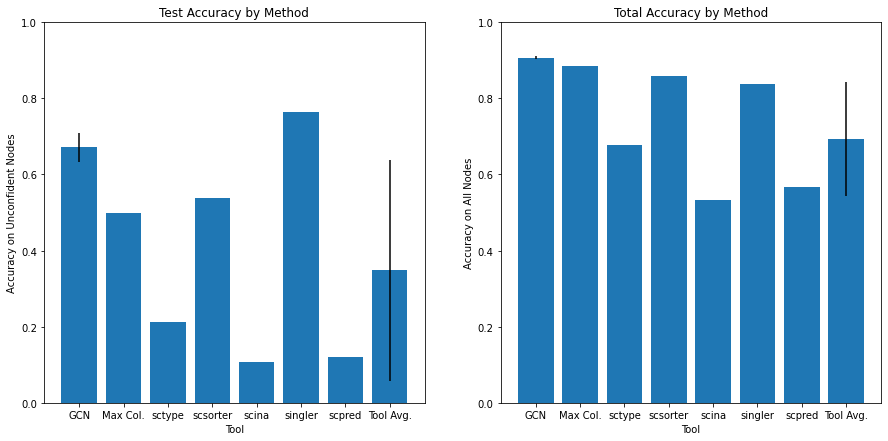

In [16]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [18]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/"]
tools = ["sctype","scsorter","scina", "singler", "scpred"]
votes_necessary = .51
model_file = "configs/2_15.txt"
neighbors = 2
batch_size=35
training_epochs=150
random_inits = 5
counts="query_counts.csv"
meta="query_meta.csv"
meta_col = "Group"

In [19]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 37.405323
Loss in epoch 10 = 0.104658
Loss in epoch 20 = 0.029990
Loss in epoch 30 = 0.011810
Loss in epoch 40 = 0.007736
Loss in epoch 50 = 0.008427
Loss in epoch 60 = 0.002968
Loss in epoch 70 = 0.002300
Loss in epoch 80 = 0.001984
Loss in epoch 90 = 0.001170
Loss in epoch 100 = 0.000940
Loss in epoch 110 = 0.000751
Loss in epoch 120 = 0.000559
Loss in epoch 130 = 0.000438
Loss in epoch 140 = 0.000477
Loss in epoch 0 = 36.296146
Loss in epoch 10 = 0.126157
Loss in epoch 20 = 0.032816
Loss in epoch 30 = 0.012739
Loss in epoch 40 = 0.006295
Loss in epoch 50 = 0.003941
Loss in epoch 60 = 0.004199
Loss in epoch 70 = 0.002007
Loss in epoch 80 = 0.001659
Loss in epoch 90 = 0.001573
Loss in epoch 100 = 0.000911
Loss in epoch 110 = 0.000742
Loss in epoch 120 = 0.000509
Loss in epoch 130 = 0.000475
Loss in epoch 140 = 0.000419
Loss in epoch 0 = 36.610821
Loss in epoch 10 = 0.094745
Loss in epoch 20 = 0.028974
Loss in epoch 30 = 0.010530
Loss in epoch 40 = 0.007738
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,splat_0.8_de_rq,GCN,0.966333,0.976035,0.8550,0.001953,0.000000,0.024367
1,splat_0.8_de_rq,Max Col.,0.934870,0.976035,0.4625,0.000000,0.000000,0.000000
2,splat_0.8_de_rq,Confident Labels,NaN,0.976035,NaN,0.000000,0.000000,0.000000
3,splat_0.8_de_rq,sctype,0.802605,0.849673,0.2625,0.000000,0.000000,0.000000
4,splat_0.8_de_rq,scsorter,0.886774,0.933551,0.3500,0.000000,0.000000,0.000000
5,splat_0.8_de_rq,scina,0.587174,0.632898,0.0625,0.000000,0.000000,0.000000
6,splat_0.8_de_rq,singler,0.851703,0.859477,0.7625,0.000000,0.000000,0.000000
7,splat_0.8_de_rq,scpred,0.716433,0.748366,0.3500,0.000000,0.000000,0.000000
8,splat_0.8_de_rq,Tool Avg.,0.768938,0.804793,0.3575,0.120066,0.116528,0.255043


(0.0, 1.0)

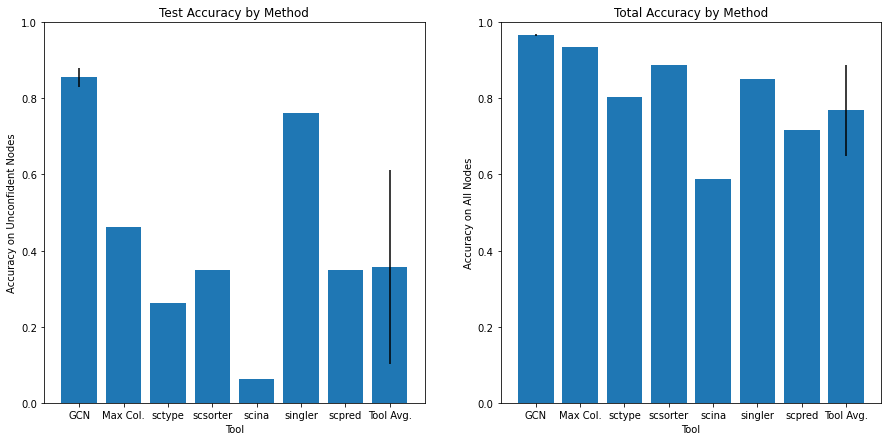

In [20]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [5]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/query_counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/preds.csv"
tool_list = ["scina", "scsorter", "sctype", "singler", "scsorter"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/markers.txt"
neighbors=2
config="configs/2_15.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [6]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=150, thresh=0.51, batch_size=35, seed=8)

Loss in epoch 0 = 36.842247
Loss in epoch 10 = 0.192708
Loss in epoch 20 = 0.038024
Loss in epoch 30 = 0.019297
Loss in epoch 40 = 0.015042
Loss in epoch 50 = 0.005633
Loss in epoch 60 = 0.004165
Loss in epoch 70 = 0.002500
Loss in epoch 80 = 0.002009
Loss in epoch 90 = 0.002820
Loss in epoch 100 = 0.001334
Loss in epoch 110 = 0.000967
Loss in epoch 120 = 0.000713
Loss in epoch 130 = 0.000643
Loss in epoch 140 = 0.000404


In [8]:
labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/query_meta.csv", index_col=0)['Group']
labels

Cell1001    Group4
Cell1002    Group3
Cell1003    Group3
Cell1004    Group3
Cell1005    Group3
             ...  
Cell1996    Group1
Cell1997    Group2
Cell1998    Group3
Cell1999    Group3
Cell2000    Group4
Name: Group, Length: 1000, dtype: object

In [9]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/umap_embedding.csv", index_col=0)
umap_embedding['real labels'] = labels

umap_embedding['confident labels'] = sharp.confident_labels
map_dict = {-1:"unknown", 0:"Group1", 1:"Group2", 2:"Group3", 3:"Group4"}
umap_embedding['confident labels'] = umap_embedding["confident labels"].map(map_dict)

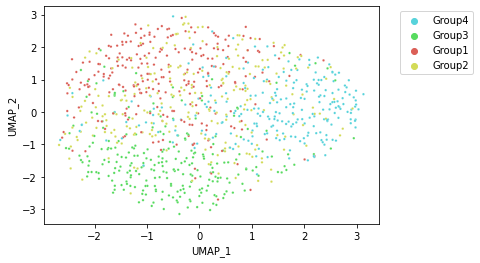

In [10]:
#pal = sns.color_palette("hls", )
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="real labels", s=6, palette=dict(Group1='#db5f57', Group2="#d3db57", Group3 = "#57db5f", Group4='#57d3db'))
plt.legend(bbox_to_anchor=(1.05,1))

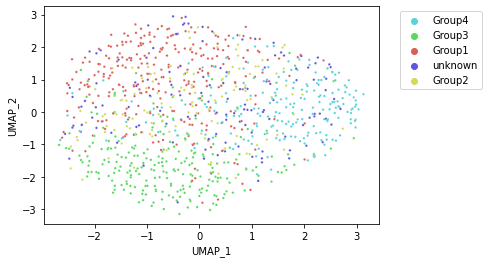

In [11]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="confident labels", s=6, palette=dict(Group1='#db5f57', Group2="#d3db57", Group3 = "#57db5f", Group4='#57d3db', unknown='#5f57db'))
plt.legend(bbox_to_anchor=(1.05,1))